In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('isreali_palestinian.csv')

In [3]:
df.head(5)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
# Handle missing values by replacing NaNs with empty strings
df = df.fillna('')


In [6]:
# Dropping all duplicate rows
df.drop_duplicates(inplace=True)

In [7]:
# Count the frequency of each citizenship value
df['citizenship'].value_counts()

citizenship
Palestinian    10085
Israeli         1029
Jordanian          2
American           1
Name: count, dtype: int64

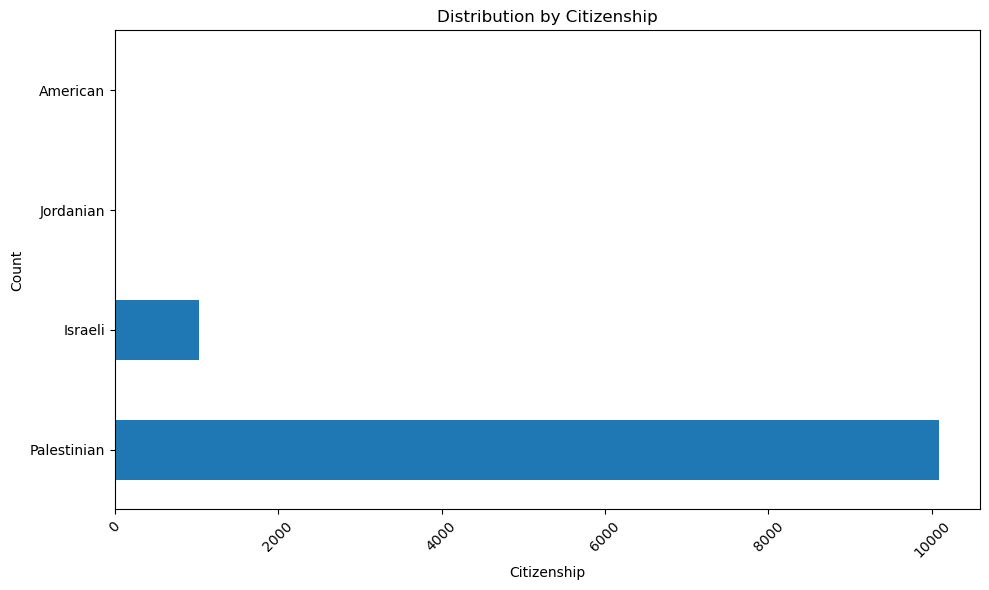

In [8]:
# Group by citizenship and count occurrences
citizenship_counts = df['citizenship'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
citizenship_counts.plot(kind='barh')

# Add labels and title
plt.title('Distribution by Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Tight layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


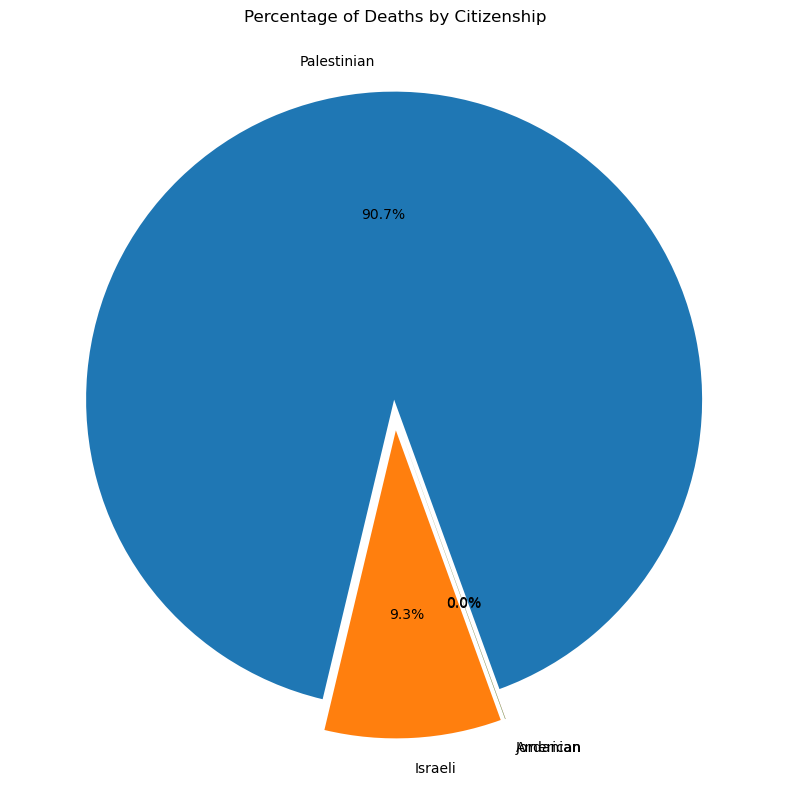

In [9]:
# Count occurrences of each citizenship value
citizenship = df['citizenship'].value_counts()

# Create a pie chart of citizenship distribution
# - figsize=(10,10): Set chart size to 10x10 inches
# - autopct='%1.1f%%': Show percentage values with 1 decimal place
# - explode=[0.05]*4: Slightly separate all 4 pie slices from center
# - startangle=290: Rotate the starting point of the pie chart
citizenship.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', explode=[0.05]*4, startangle=290)

# Add title to the chart
plt.title("Percentage of Deaths by Citizenship")
# Remove y-axis label (not needed for pie charts)
plt.ylabel('')

# Display the chart
plt.show()

In [10]:
# Count the frequency of each unique value in the 'type_of_injury' column
# This helps understand the distribution of injury types in the dataset
df['type_of_injury'].value_counts()

type_of_injury
gunfire                         9843
explosion                        555
shelling                         311
                                 290
stabbing                          48
house demolition                  25
hit by a vehicle                  18
beating                            9
stones throwing                    6
fire                               4
being bludgeoned with an axe       4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: count, dtype: int64

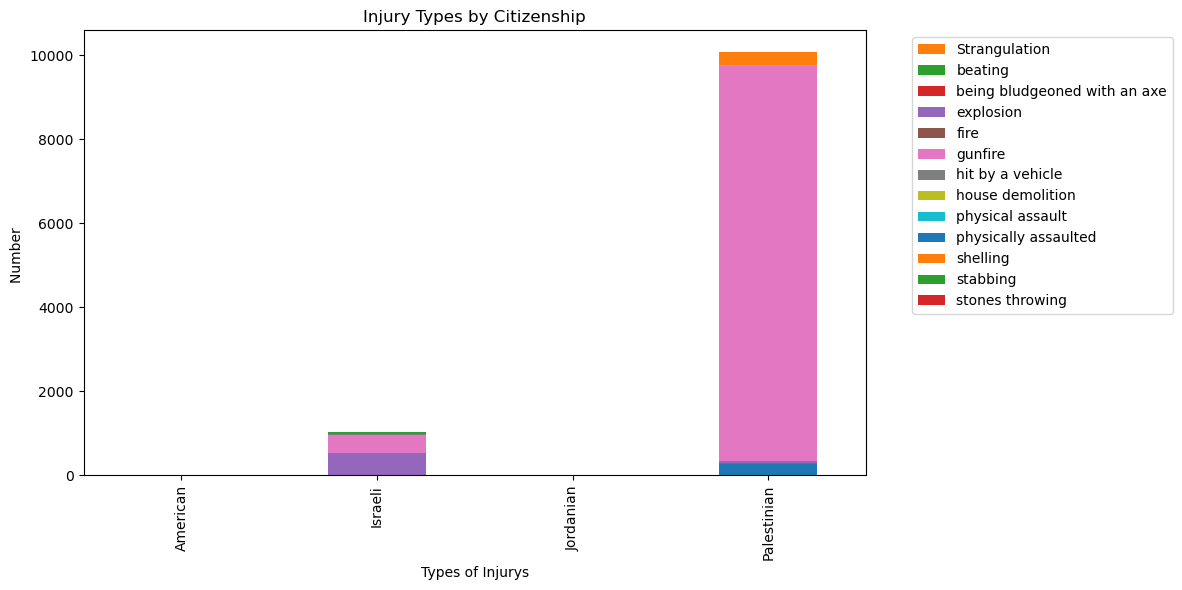

In [11]:
# Group data by citizenship and type of injury, counting occurrences
# This creates a cross-tabulation with citizenship as rows and injury types as columns
type_of_in = df.groupby(['citizenship','type_of_injury']).size().unstack(fill_value=0)

# Create a stacked bar chart showing injury types for each citizenship
# The stacked format allows comparison of both total injuries and distribution by type
type_of_in.plot(kind='bar',figsize=(12,6),stacked=True)

# Add title and axis labels to improve chart readability
plt.title('Injury Types by Citizenship')
plt.xlabel('Types of Injurys')
plt.ylabel('Number ')

# Position the legend outside the plot to avoid overlapping with data
plt.legend(bbox_to_anchor=(1.05,1))

# Adjust layout to ensure all elements are visible
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# Group the dataframe by 'citizenship' and 'type_of_injury' columns
# Count the number of occurrences for each combination
# sort=False preserves the original order of categories
type_of_in = df.groupby(['citizenship','type_of_injury'],sort=False).size()
type_of_in  # Display the resulting Series with multi-level index

citizenship  type_of_injury              
Palestinian  gunfire                         9402
             stabbing                           5
Israeli      gunfire                          438
             hit by a vehicle                  14
             explosion                        508
             stabbing                          43
Palestinian  explosion                         47
Israeli      physical assault                   1
Palestinian  shelling                         311
Israeli      being bludgeoned with an axe       4
Jordanian    gunfire                            2
Palestinian  physically assaulted               1
             hit by a vehicle                   4
Israeli      physically assaulted               1
Palestinian  beating                            5
             stones throwing                    2
Israeli      Strangulation                      1
American     gunfire                            1
Israeli                                        11
        

In [13]:
# Replace gender codes 'M' and 'F' with their full forms 'Male' and 'Female' for better readability
df['gender'] = df['gender'].replace({'M':'Male','F':'Female'})

In [14]:
# Group the dataframe by 'gender', 'citizenship', and 'type_of_injury' columns
# Count the number of occurrences for each unique combination
# sort=False preserves the original order of categories
gen_citi_inju = df.groupby(['gender', 'citizenship', 'type_of_injury'], sort=False).size()
# Display the resulting Series with hierarchical index
gen_citi_inju

gender  citizenship  type_of_injury              
Male    Palestinian  gunfire                         8349
                     stabbing                           5
Female  Israeli      gunfire                           91
Male    Israeli      gunfire                          347
Female  Palestinian  gunfire                         1040
Male    Israeli      hit by a vehicle                  10
                     explosion                        290
                     stabbing                          29
        Palestinian  explosion                         47
Female  Israeli      physical assault                   1
Male    Palestinian  shelling                         291
Female  Palestinian  shelling                          20
Male    Israeli      being bludgeoned with an axe       4
        Jordanian    gunfire                            1
        Palestinian  physically assaulted               1
                     hit by a vehicle                   4
Female  Israeli      p

In [15]:
# Convert 'date_of_death' and 'date_of_event' columns to datetime format
# The columns are swapped in the assignment to correct a previous error
# 'errors='coerce'' converts invalid date formats to NaT (Not a Time) values
df[['date_of_event','date_of_death']] = df[['date_of_death','date_of_event']].apply(pd.to_datetime,errors='coerce')

In [16]:
# Display the first 5 rows of the dataframe to get a quick overview of the data structure
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,Male,,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,Male,,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,Male,,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [17]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,Male,,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,Male,,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,Male,,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


Number of people aged 18 or under: 2630
Number of people aged gerather 18 8365


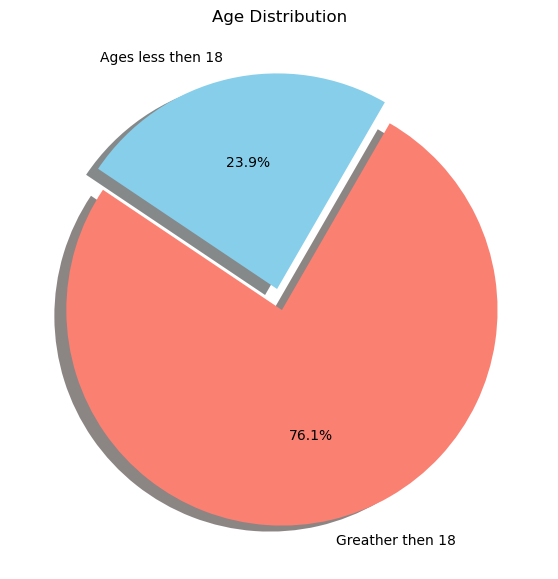

In [18]:
# Make sure Age is numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Count rows where Age <= 18
num_under_18 = (df['age'] <= 18).sum()
num_abve_18 = (df['age']>18).sum()
print("Number of people aged 18 or under:", num_under_18)
print('Number of people aged gerather 18',num_abve_18)
# Counts for the two groups
counts = [num_under_18, num_abve_18]

# Labels for the groups
age_labels = ['Ages less then 18', 'Greather then 18']

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    counts,  
    labels=age_labels,       
    autopct='%1.1f%%', 
    colors=['skyblue', 'salmon'],
    startangle=60,
    explode=[0.05]*2,
    shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}
)
plt.title('Age Distribution')
plt.show()


In [19]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,Male,,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,Male,,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,Male,,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [20]:
df.columns = map(str.capitalize,df.columns)

In [21]:
df.head(4)

,Name,Date_of_event,Age,Citizenship,Event_location,Event_location_district,Event_location_region,Date_of_death,Gender,Took_part_in_the_hostilities,Place_of_residence,Place_of_residence_district,Type_of_injury,Ammunition,Killed_by,Notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,Male,,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,Male,,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...


In [22]:
df['Notes'].head(4)

0    Fatally shot by Israeli forces while standing ...
1    Fatally shot by Israeli forces while trying to...
2    Fatally shot by soldiers while firing at them ...
3    Shot in the head by Israeli forces while throw...
Name: Notes, dtype: object

In [23]:
# Display first 5 rows fully
df['Notes'].head()


0    Fatally shot by Israeli forces while standing ...
1    Fatally shot by Israeli forces while trying to...
2    Fatally shot by soldiers while firing at them ...
3    Shot in the head by Israeli forces while throw...
4    Wounded by soldiers’ gunfire after running awa...
Name: Notes, dtype: object

In [24]:
# Age groups
age_counts = [df[df['Age'] <= 18].shape[0], df[df['Age'] > 18].shape[0]]
age_labels = ['Under 18', '18 and older']

# Citizenship of under-18
under_18 = df[df['Age'] < 18]
citizenship_counts = under_18['Citizenship'].value_counts()


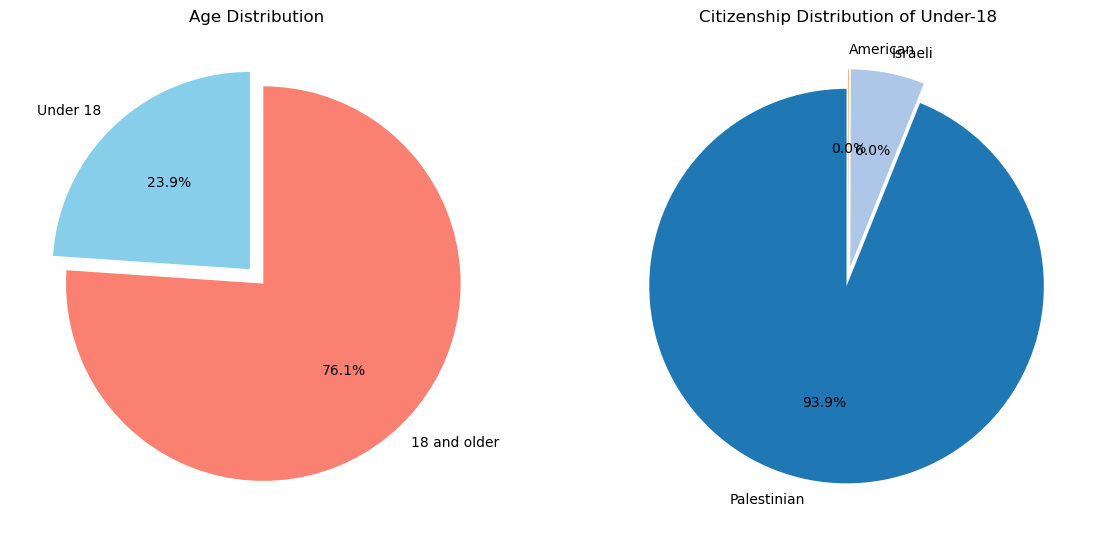

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart 1: Age groups
axes[0].pie(
    age_counts,
    labels=age_labels,
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=90,
    explode=[0.05, 0.05]
)
axes[0].set_title('Age Distribution')

# Pie chart 2: Citizenship of under-18
axes[1].pie(
    citizenship_counts,
    labels=citizenship_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05]*len(citizenship_counts),
    colors=plt.cm.tab20.colors[:len(citizenship_counts)]
)
axes[1].set_title('Citizenship Distribution of Under-18')

plt.show()


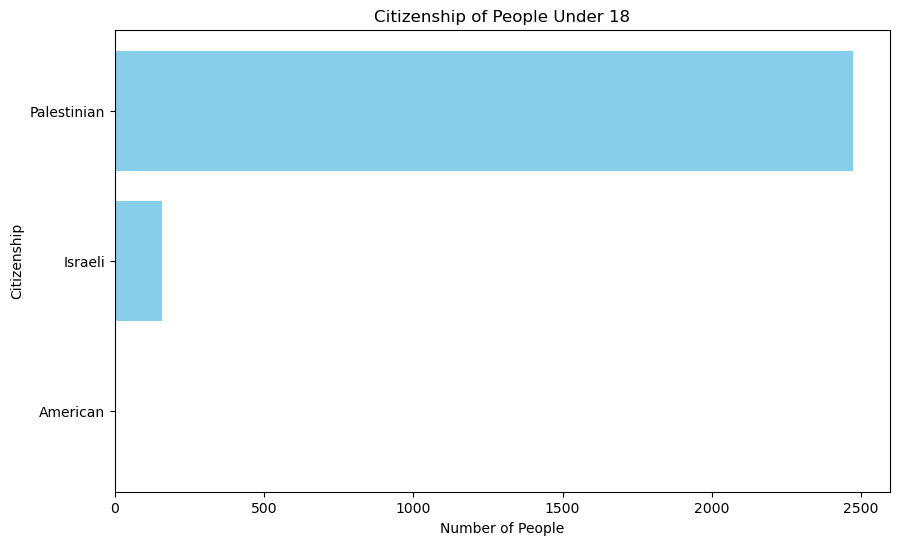

In [26]:
# Count under-18 and over-18 by citizenship
under_18_counts = df[df['Age'] <= 18]['Citizenship'].value_counts()
over_18_counts = df[df['Age'] > 18]['Citizenship'].value_counts()

# Plot horizontal bar chart for under-18
plt.figure(figsize=(10,6))
plt.barh(under_18_counts.index, under_18_counts.values, color='skyblue')
plt.xlabel('Number of People')
plt.ylabel('Citizenship')
plt.title('Citizenship of People Under 18')
plt.gca().invert_yaxis()  # largest on top
plt.show()


In [27]:
df.head(2)

,Name,Date_of_event,Age,Citizenship,Event_location,Event_location_district,Event_location_region,Date_of_death,Gender,Took_part_in_the_hostilities,Place_of_residence,Place_of_residence_district,Type_of_injury,Ammunition,Killed_by,Notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...


In [28]:
df['Gender'].value_counts()

Gender
Male      9680
Female    1423
            14
Name: count, dtype: int64

In [29]:
df.head(5)

,Name,Date_of_event,Age,Citizenship,Event_location,Event_location_district,Event_location_region,Date_of_death,Gender,Took_part_in_the_hostilities,Place_of_residence,Place_of_residence_district,Type_of_injury,Ammunition,Killed_by,Notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,Male,,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,Male,,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,Male,,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,Male,,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
